# Note
Model is taken at its best, meaning lowest training loss and validation loss.  

# Load up evaluation dataset

In [31]:
import pandas as pd 
import numpy as np
import os 

from transformers import AutoModelForSequenceClassification, AutoTokenizer
import transformers

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D
sns.set_theme(style="white", palette="mako")
matplotlib.rcParams['figure.figsize'] = 12, 8
os.listdir('./dataset')

['emo_ds.csv', 'emo_evaluation_lbe.csv', 'emo_evaluation.csv', 'emo_ds.txt']

In [35]:
os.getcwd()

'/Users/jiong/Code/ForwardSchool/fs-FinalProject/nlp-testground/emo_classification'

In [3]:
pd.read_csv("./dataset/emo_evaluation.csv").head()

,sentence,label
0,i feel like not caring,love
1,i are gay and feel assaulted by the right wing,fear
2,i think all acts of unkindness are a result of...,anger
3,i will never make him feel disliked and like h...,sadness
4,i think he is the next best because i see a lo...,joy


In [53]:
df = pd.read_csv("./dataset/emo_evaluation_lbe.csv")
df.head()

,text,label
0,i feel like not caring,3
1,i are gay and feel assaulted by the right wing,1
2,i think all acts of unkindness are a result of...,0
3,i will never make him feel disliked and like h...,4
4,i think he is the next best because i see a lo...,2


In [54]:
emotions = {0:'anger', 1:'fear', 2:'joy', 3:'love', 4:'sadness', 5:'surprise'}

In [55]:
evaluation_data = df.text.values.tolist()
y_true = df.label.values.tolist()

# Model 1: Microsoft/xtremedistil-l6-h384-uncased

In [10]:

columns = ["Epoch", "Training Loss", "Validation Loss"]
raw_data = [(1, 0.372400, 0.333598),
    (2, 0.277500, 0.262505),
    (3, 0.235000, 0.216206),
    (4, 0.199200, 0.180761),
    (5, 0.172300, 0.158213),
    (6, 0.152100, 0.143179),
    (7, 0.143000, 0.133735),
    (8, 0.134000, 0.127749),
    (9, 0.125400, 0.125538),
    (1, 0.126300, 0.123785),
    (1, 0.111200, 0.108629),
    (2, 0.098700, 0.101805),
    (3, 0.091600, 0.090167),
    (4, 0.083400, 0.085851),
    (5, 0.077400, 0.085138),
    (6, 0.071600, 0.081778),
    (7, 0.068800, 0.080090),
    (8, 0.071400, 0.078629),
    (9, 0.063500, 0.079561),
    (10,0.063700,0.078489),
    (1, 0.058600, 0.078357),
    (2, 0.051900, 0.082639),
    (3, 0.053500, 0.079788),
    (4, 0.053700, 0.077560),
    (5, 0.047700, 0.082819),
    (6, 0.046400, 0.083885),
    (7, 0.044200, 0.082203),
    (8, 0.047000, 0.081549),
    (9, 0.043100, 0.084228),
    (10,0.041100,0.081586),
    (11,0.044000,0.081943),
    (12,0.037300,0.082717),
    (13,0.040200,0.084581),
    (14,0.036800,0.085591),
    (15,0.034300,0.084093),
    (16,0.036000,0.084867),
    (17,0.032400,0.085053),
    (18,0.030200,0.085233),
    (19,0.030300,0.085616),
    (20,0.035100,0.086052)]

In [14]:
df = pd.DataFrame(raw_data, columns=columns)
df.Epoch = [x for x in range(1, len(df)+1)]
df.head()

,Epoch,Training Loss,Validation Loss
0,1,0.3724,0.333598
1,2,0.2775,0.262505
2,3,0.2350,0.216206
3,4,0.1992,0.180761
4,5,0.1723,0.158213


Text(0.5, 1.0, 'Model Microsoft-xtremedistil Training & Validation Loss')

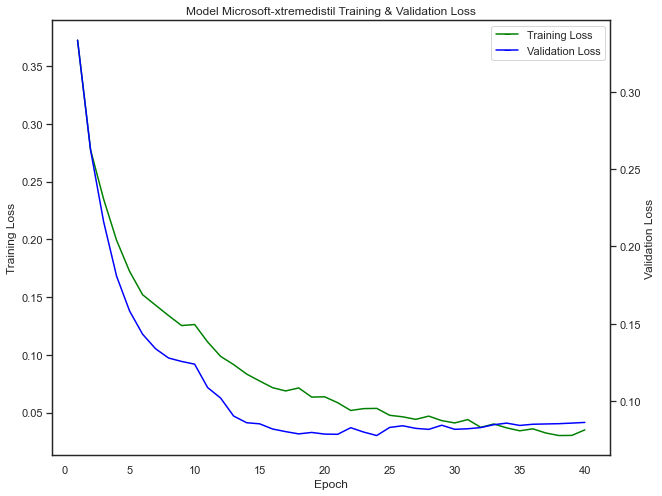

In [32]:

fig, ax = plt.subplots(figsize=(10,8))

first = sns.lineplot(data=df, x= 'Epoch', y='Training Loss', color="g", ax =ax)

sns.lineplot(data=df, x= 'Epoch', y='Validation Loss', color="b", ax=first.axes.twinx())

first.legend(handles=[Line2D([], [], marker='_', color="g", label='Training Loss'), 
                      Line2D([], [], marker='_', color="b", label='Validation Loss')])

ax.set_title("Model Microsoft-xtremedistil Training & Validation Loss")

In [36]:
#plt.savefig('Model_1-Microsoft-xtremedistil Training & Validation Loss.png')
first.figure.savefig('Model_1-Microsoft-xtremedistil Training & Validation Loss.png')

## Import fine tuned model 

In [25]:

model_name = 'microsoft/xtremedistil-l6-h384-uncased'
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained("./microsoft-xtremedistil/checkpoint-17500/")

In [26]:
model

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 384, padding_idx=0)
      (position_embeddings): Embedding(512, 384)
      (token_type_embeddings): Embedding(2, 384)
      (LayerNorm): LayerNorm((384,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=384, out_features=384, bias=True)
              (key): Linear(in_features=384, out_features=384, bias=True)
              (value): Linear(in_features=384, out_features=384, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=384, out_features=384, bias=True)
              (LayerNorm): LayerNorm((384,), eps=1e-12, element

In [27]:
emotions = ['anger', 'fear', 'joy', 'love', 'sadness', 'surprise']

In [30]:
pipeline = transformers.pipeline("text-classification",model=model,tokenizer=tokenizer)

In [35]:
display(pipeline("I am angry!"))
display(pipeline("I am scared!"))
display(pipeline("I am happy!"))
display(pipeline("I love it!"))
display(pipeline("I am sad!"))
display(pipeline("I am surprised!"))


[{'label': 'LABEL_0', 'score': 0.9720615148544312}]

[{'label': 'LABEL_1', 'score': 0.9657977223396301}]

[{'label': 'LABEL_2', 'score': 0.9904999136924744}]

[{'label': 'LABEL_3', 'score': 0.703781008720398}]

[{'label': 'LABEL_4', 'score': 0.9868505001068115}]

[{'label': 'LABEL_5', 'score': 0.8160880208015442}]

In [48]:
def model_pred(sentence):
    return int(pipeline(sentence)[0]['label'].split('_')[-1])

# TEST..
model_pred("today is a good day")

2

### Predict evaluation dataset with model.

In [53]:
import time
start = time.time()

y_pred = [model_pred(x) for x in evaluation_data]

end = time.time()
total = end - start
print(f"took {total}s, to evaluate the dataset consists of {len(df)} rows of data.")


took 39.07003211975098s, to evaluate the dataset consists of 6000 rows of data.


### Model evluation 

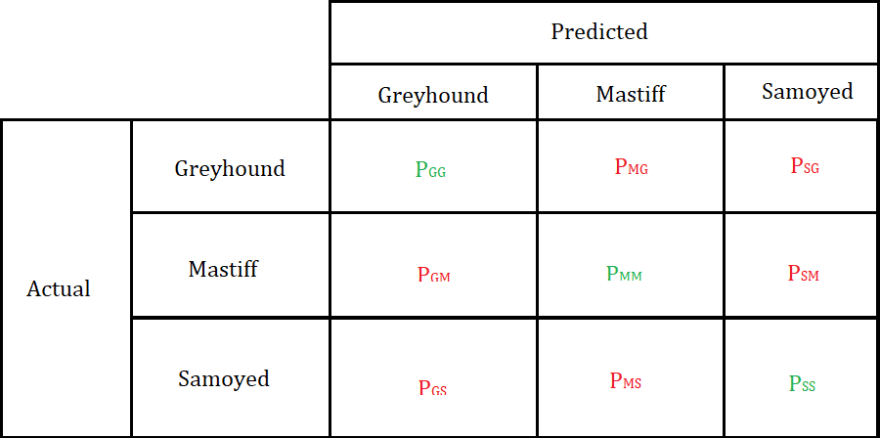
Understanding multiclass confusion matrix.

In [79]:
list(emotions.values())

['anger', 'fear', 'joy', 'love', 'sadness', 'surprise']

In [91]:
# CONFUSION MATRIX 
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true, y_pred)

df_test = pd.DataFrame(confusion_matrix(y_true, y_pred), columns = list(emotions.values()), index = list(emotions.values()))
df_test = pd.concat([df_test], keys=['Actual'])
df_test = pd.concat([df_test],keys=['Predicted'], axis =1  )
df_test

Predicted                                 
                    anger fear   joy love sadness surprise
Actual anger          758   20    10    7      33        0
       fear            21  635     3    0      21        5
       joy              9    7  1892   86      21        6
       love             8    3    72  414       5        1
       sadness         20   26    12    7    1681        0
       surprise         1   49    16    2       6      143

In [63]:
from sklearn.metrics import *
f1_s = f1_score(y_true, y_pred, average='weighted')
p_s = precision_score(y_true, y_pred, average='weighted')
r_s = recall_score(y_true, y_pred, average='weighted')
acc_s = accuracy_score(y_true, y_pred)

print(f1_s)
print(p_s)
print(r_s)
print(acc_s)

0.9199303425125851
0.9213166295870436
0.9205
0.9205


# Model 2: distilbert-base-cased

In [39]:
columns = ["Epoch", "Training Loss", "Validation Loss", "Accuracy"]
raw_data = [(1, 0.301200, 0.204732, 0.928000),
    (2, 0.164300, 0.235428, 0.932333),
    (3, 0.109400, 0.240060, 0.929833)]    
df = pd.DataFrame(raw_data, columns=columns)

In [40]:
df

,Epoch,Training Loss,Validation Loss,Accuracy
0,1,0.3012,0.204732,0.928000
1,2,0.1643,0.235428,0.932333
2,3,0.1094,0.240060,0.929833


Text(0.5, 1.0, 'Model Google-distilbert-base-cased Training & Validation Loss')

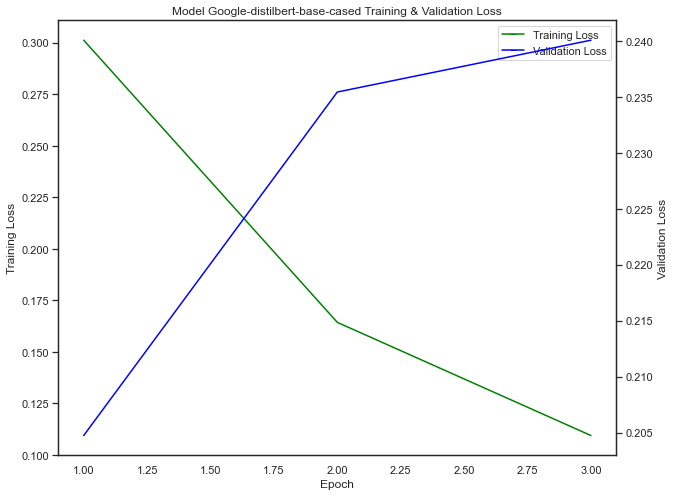

In [41]:

fig, ax = plt.subplots(figsize=(10,8))

first = sns.lineplot(data=df, x= 'Epoch', y='Training Loss', color="g", ax =ax)

sns.lineplot(data=df, x= 'Epoch', y='Validation Loss', color="b", ax=first.axes.twinx())

first.legend(handles=[Line2D([], [], marker='_', color="g", label='Training Loss'), 
                      Line2D([], [], marker='_', color="b", label='Validation Loss')])

ax.set_title("Model Google-distilbert-base-cased Training & Validation Loss")

In [42]:
first.figure.savefig('Model_2-Google-distilbert-base-cased Training & Validation Loss.png')

## Import fine tuned model 

In [46]:
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-cased")
model = AutoModelForSequenceClassification.from_pretrained("./model/google-distillber-base-cased/distilbert-base-cased_emo-classification/")

In [47]:
pipeline = transformers.pipeline("text-classification",model=model,tokenizer=tokenizer)

In [48]:
emotions

{0: 'anger', 1: 'fear', 2: 'joy', 3: 'love', 4: 'sadness', 5: 'surprise'}

In [49]:
display(pipeline("I am angry!"))
display(pipeline("I am scared!"))
display(pipeline("I am happy!"))
display(pipeline("I love it!"))
display(pipeline("I am sad!"))
display(pipeline("I am surprised!"))


[{'label': 'LABEL_0', 'score': 0.9974804520606995}]

[{'label': 'LABEL_1', 'score': 0.9992560744285583}]

[{'label': 'LABEL_2', 'score': 0.9997629523277283}]

[{'label': 'LABEL_2', 'score': 0.5036839842796326}]

[{'label': 'LABEL_4', 'score': 0.99293053150177}]

[{'label': 'LABEL_5', 'score': 0.9976279139518738}]

In [50]:
def model_pred(sentence):
    return int(pipeline(sentence)[0]['label'].split('_')[-1])

# TEST..
model_pred("today is a good day")

2

### Predict evaluation dataset with model 

In [56]:
import time
start = time.time()

y_pred = [model_pred(x) for x in evaluation_data]

end = time.time()
total = end - start
print(f"took {total}s, to evaluate the dataset consists of {len(df)} rows of data.")


took 112.49158692359924s, to evaluate the dataset consists of 6000 rows of data.


## Model evaluation

In [57]:
# CONFUSION MATRIX 
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true, y_pred)

df_test = pd.DataFrame(confusion_matrix(y_true, y_pred), columns = list(emotions.values()), index = list(emotions.values()))
df_test = pd.concat([df_test], keys=['Actual'])
df_test = pd.concat([df_test],keys=['Predicted'], axis =1  )
df_test

Predicted                                 
                    anger fear   joy love sadness surprise
Actual anger          734   43    25    2      24        0
       fear             2  598     4    1      19       61
       joy              2    5  1973   29      11        1
       love             2    0   101  398       2        0
       sadness         27   14    18    0    1687        0
       surprise         0    6    23    1       3      184

In [100]:
from sklearn.metrics import *
f1_s = f1_score(y_true, y_pred, average='weighted')
p_s = precision_score(y_true, y_pred, average='weighted')
r_s = recall_score(y_true, y_pred, average='weighted')
acc_s = accuracy_score(y_true, y_pred)

print(f1_s)
print(p_s)
print(r_s)
print(acc_s)

0.9285618962726909
0.9301736498261531
0.929
0.929


# Model 3: bert-base-cased

In [60]:

columns = ["Epoch", "Training Loss", "Validation Loss", "Accuracy"]

raw_data = [(1, 0.338500, 0.267363, 0.919833),
            (2, 0.187800, 0.250565, 0.926833),
            (3, 0.166900, 0.213768, 0.935167),
            (4, 0.112800, 0.302637, 0.929167),
            (5, 0.062300, 0.402976, 0.928167),
            (6, 0.038600, 0.411643, 0.928500)]
df = pd.DataFrame(raw_data, columns = columns)
df

,Epoch,Training Loss,Validation Loss,Accuracy
0,1,0.3385,0.267363,0.919833
1,2,0.1878,0.250565,0.926833
2,3,0.1669,0.213768,0.935167
3,4,0.1128,0.302637,0.929167
4,5,0.0623,0.402976,0.928167
5,6,0.0386,0.411643,0.928500


Text(0.5, 1.0, 'Model Google-bert-base-cased Training & Validation Loss')

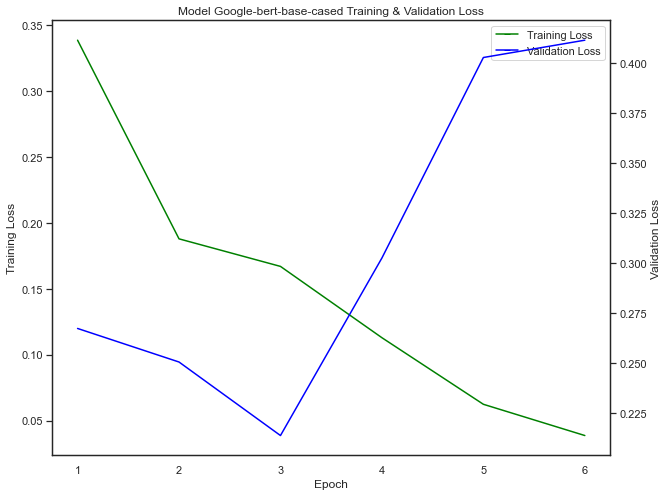

In [61]:

fig, ax = plt.subplots(figsize=(10,8))

first = sns.lineplot(data=df, x= 'Epoch', y='Training Loss', color="g", ax =ax)

sns.lineplot(data=df, x= 'Epoch', y='Validation Loss', color="b", ax=first.axes.twinx())

first.legend(handles=[Line2D([], [], marker='_', color="g", label='Training Loss'), 
                      Line2D([], [], marker='_', color="b", label='Validation Loss')])

ax.set_title("Model Google-bert-base-cased Training & Validation Loss")


In [62]:
first.figure.savefig('Model_3-Google-bert-base-cased Training & Validation Loss.png')

## Import fine tuned model

In [106]:
tokenizer = AutoTokenizer.from_pretrained('bert-base-cased')
model = AutoModelForSequenceClassification.from_pretrained("./google-bert-base-cased/checkpoint-4500/")

In [107]:
pipeline = transformers.pipeline("text-classification",model=model,tokenizer=tokenizer)

In [108]:
# This model failed basic test, tho other classes are predicted with high confidence score. 
display(pipeline("I am angry!"))
display(pipeline("I am scared!"))
display(pipeline("I am happy!"))
display(pipeline("I love it!"))
display(pipeline("I am sad!"))
display(pipeline("I am surprised!"))


[{'label': 'LABEL_0', 'score': 0.9993446469306946}]

[{'label': 'LABEL_1', 'score': 0.9994953870773315}]

[{'label': 'LABEL_2', 'score': 0.9990615248680115}]

[{'label': 'LABEL_0', 'score': 0.9844323396682739}]

[{'label': 'LABEL_4', 'score': 0.9995754361152649}]

[{'label': 'LABEL_5', 'score': 0.9986791014671326}]

In [109]:
def model_pred(sentence):
    return int(pipeline(sentence)[0]['label'].split('_')[-1])

# TEST..
model_pred("today is a good day")

2

In [110]:
emotions

{0: 'anger', 1: 'fear', 2: 'joy', 3: 'love', 4: 'sadness', 5: 'surprise'}

### Predict evaluation dataset with model 

In [111]:
import time
start = time.time()

y_pred = [model_pred(x) for x in evaluation_data]

end = time.time()
total = end - start
print(f"took {total}s, to evaluate the dataset consists of {len(df)} rows of data.")


took 227.18234872817993s, to evaluate the dataset consists of 6000 rows of data.


## Model evaluation

In [112]:
# CONFUSION MATRIX 
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true, y_pred)

df_test = pd.DataFrame(confusion_matrix(y_true, y_pred), columns = list(emotions.values()), index = list(emotions.values()))
df_test = pd.concat([df_test], keys=['Actual'])
df_test = pd.concat([df_test],keys=['Predicted'], axis =1  )
df_test

Predicted                                 
                    anger fear   joy love sadness surprise
Actual anger          809    2     5    2      10        0
       fear            38  614     0    1      30        2
       joy             10    4  1913   75       9       10
       love             5    1    65  429       3        0
       sadness         44    6    13    0    1682        1
       surprise         1   49    10    1       3      153

In [113]:
from sklearn.metrics import *
f1_s = f1_score(y_true, y_pred, average='weighted')
p_s = precision_score(y_true, y_pred, average='weighted')
r_s = recall_score(y_true, y_pred, average='weighted')
acc_s = accuracy_score(y_true, y_pred)

print(f1_s)
print(p_s)
print(r_s)
print(acc_s)

0.9328245916803753
0.9339189306545145
0.9333333333333333
0.9333333333333333
